ソースとターゲットの骨格をとってくる

足が血に付いてる状態の足首の座標を統計する

地面との最大距離＆最小距離から線形的に全体の座標をShift（平行移動）する

In [1]:
%cd drive/My Drive/Colab Notebooks/EDN/pytorch-EverybodyDanceNow-master/notebook

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/EDN/pytorch-EverybodyDanceNow-master/notebook'
/content


In [0]:
import cv2
from pathlib import Path

In [0]:
source_dir = Path('../data/source/')
source_dir.mkdir(exist_ok=True)

simg_dir = source_dir.joinpath('images')
simg_dir.mkdir(exist_ok=True)

In [0]:
source_img_dir = source_dir.joinpath('test_img')
source_img_dir.mkdir(exist_ok=True)
source_label_dir = source_dir.joinpath('test_label')
source_label_dir.mkdir(exist_ok=True)

In [0]:
targat_dir = Path('../data/target/')
targat_dir.mkdir(exist_ok=True)

timg_dir = targat_dir.joinpath('images')
timg_dir.mkdir(exist_ok=True)

In [0]:
train_dir = targat_dir.joinpath('train')
train_dir.mkdir(exist_ok=True)

train_img_dir = train_dir.joinpath('train_img')
train_img_dir.mkdir(exist_ok=True)
train_label_dir = train_dir.joinpath('train_label')
train_label_dir.mkdir(exist_ok=True)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

%matplotlib inline

In [0]:

openpose_dir = Path('../src/pytorch_Realtime_Multi-Person_Pose_Estimation/')

import sys
sys.path.append(str(openpose_dir))
sys.path.append('../src/utils')

%reload_ext autoreload
%autoreload 2

In [0]:
# openpose
from network.rtpose_vgg import get_model
from evaluate.coco_eval import get_multiplier, get_outputs

# utils
from openpose_utils import remove_noise, get_pose ,norm_pose

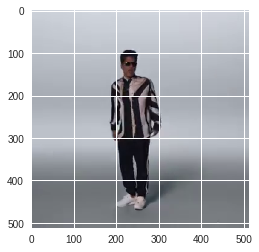

In [8]:
simg_path = sorted(simg_dir.iterdir())[137]
simg = cv2.imread(str(simg_path))
shape_dst = np.min(simg.shape[:2])
# offset
oh = (simg.shape[0] - shape_dst) // 2
ow = (simg.shape[1] - shape_dst) // 2

simg = simg[oh:oh+shape_dst, ow:ow+shape_dst]
simg = cv2.resize(simg, (512, 512))
          
plt.imshow(simg[:,:,[2, 1, 0]]) # BGR -> RGB

In [9]:
weight_name = openpose_dir.joinpath('pose_model.pth')
model = get_model('vgg19')     
model.load_state_dict(torch.load(weight_name))
model = torch.nn.DataParallel(model).cuda()
model.float()
model.eval()
pass

Bulding VGG19


In [0]:
b=369
ANKLE_IDS = [13] 

In [0]:
multiplier = get_multiplier(simg)
with torch.no_grad():
    paf, heatmap = get_outputs(multiplier, simg, model, 'rtpose')
    
r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
heatmap[:, :, :-1] = r_heatmap
param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
label = norm_pose(param, heatmap, paf)

plt.imshow(label)

In [22]:
joint_list_per_joint_type =NMS(param, heatmap)
joint_list = np.array([tuple(peak) + (joint_type,) for joint_type,
                           joint_peaks in enumerate(joint_list_per_joint_type) for peak in joint_peaks])
joint_list

array([[2.87000000e+02, 1.01000000e+02, 3.94372912e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.91000000e+02, 1.34000000e+02, 5.29529840e-01, 1.00000000e+00,
        1.00000000e+00],
       [2.57000000e+02, 1.35000000e+02, 5.85880760e-01, 2.00000000e+00,
        2.00000000e+00],
       [2.47000000e+02, 1.86000000e+02, 3.32912182e-01, 3.00000000e+00,
        3.00000000e+00],
       [2.45000000e+02, 2.04000000e+02, 1.82390808e-01, 4.00000000e+00,
        4.00000000e+00],
       [3.21000000e+02, 1.35000000e+02, 3.85751784e-01, 5.00000000e+00,
        5.00000000e+00],
       [3.17000000e+02, 1.39000000e+02, 1.29081524e-01, 6.00000000e+00,
        6.00000000e+00],
       [3.14000000e+02, 1.07000000e+02, 1.48643408e-01, 7.00000000e+00,
        7.00000000e+00],
       [2.69000000e+02, 2.39000000e+02, 3.55236515e-01, 8.00000000e+00,
        8.00000000e+00],
       [2.20000000e+02, 3.15000000e+02, 2.85074851e-01, 9.00000000e+00,
        9.00000000e+00],
       [2.22000000e+02, 3.9700

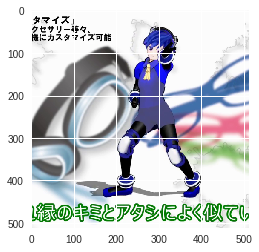

In [18]:
timg_path = sorted(timg_dir.iterdir())[438]
timg = cv2.imread(str(timg_path))
shape_dst = np.min(timg.shape[:2])
# offset
oh = (timg.shape[0] - shape_dst) // 2
ow = (timg.shape[1] - shape_dst) // 2

timg = timg[oh:oh+shape_dst, ow:ow+shape_dst]
timg = cv2.resize(timg, (512, 512))
          
plt.imshow(timg[:,:,[2, 1, 0]]) # BGR -> RGB

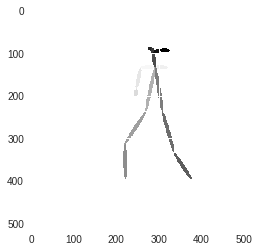

In [19]:
multiplier = get_multiplier(timg)
with torch.no_grad():
    paf, heatmap = get_outputs(multiplier, timg, model, 'rtpose')
    
r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
heatmap[:, :, :-1] = r_heatmap
param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
label = get_pose(param, heatmap, paf)

plt.imshow(label)

In [0]:
import numpy as np
np.set_printoptions(threshold=100)

In [0]:
import numpy as np
import math
import cv2
from skimage import filters
from scipy import ndimage

# openpose
import sys
sys.path.append('../pytorch_Realtime_Multi-Person_Pose_Estimation')

from network.post import *

## 統計する

In [0]:
##source
ANKLE_ID = 11 # 足首の番号(今は適当)
ANKLE_IDS = [10, 13] # 複数の場合
scount = 0
ssum_ankle_y = 0
smin_ankle_y = 10**10
smax_ankle_y = -1
for idx in tqdm(range(171, 171+50)):
    simg_path = simg_dir.joinpath(f'img_{idx:04d}.png')
    simg = cv2.imread(str(simg_path))
    shape_dst = np.min(simg.shape[:2])
    oh = (simg.shape[0] - shape_dst) // 2
    ow = (simg.shape[1] - shape_dst) // 2

    simg = simg[oh:oh+shape_dst, ow:ow+shape_dst]
    simg = cv2.resize(simg, (512, 512))
    multiplier = get_multiplier(simg)
    with torch.no_grad():
        paf, heatmap = get_outputs(multiplier, simg, model, 'rtpose')
    r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
    heatmap[:, :, :-1] = r_heatmap
    param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
    c = NMS(param, heatmap)
    # ここに、全てのcに対するfor文
    for i, x in enumerate(c):
    #   print(i, len(x))
      if len(x) == 0:
        continue
      elif len(x) >= 2:
        for xx in x:
          # 足首IDと一致したら足す
    #       if xx[-1] == ANKLE_ID:
    #         min_ankle_y = min(min_ankle_y, xx[1])
    #         max_ankle_y = max(max_ankle_y, xx[1])
    #         sum_ankle_y += xx[1]
    #         count += 1
    #         break
          # 複数の場合
          if xx[-1] in ANKLE_IDS and xx[1]>300:
           
            smin_ankle_y = min(smin_ankle_y, xx[1])
            smax_ankle_y = max(smax_ankle_y, xx[1])
            ssum_ankle_y += xx[1]
            count += 1
        continue
      x = x[0]
      # 足首IDと一致したら足す
    #   if x[-1] == ANKLE_ID:
    #     min_ankle_y = min(min_ankle_y, x[1])
    #     max_ankle_y = max(max_ankle_y, x[1])
    #     sum_ankle_y += x[1]
    #     count += 1
    #     break
      # 複数の場合
      if x[-1] in ANKLE_IDS and x[1]>300:
        smin_ankle_y = min(smin_ankle_y, x[1])
        smax_ankle_y = max(smax_ankle_y, x[1])
        ssum_ankle_y += x[1]
        count += 1
        
torch.cuda.empty_cache()

savg_ankle_y = ssum_ankle_y / scount

print('savg:{}, smin:{}, smax{}, scount{}'.format(savg_ankle_y, smin_ankle_y, smax_ankle_y, scount))





  0%|          | 0/50 [00:00<?, ?it/s]



  2%|▏         | 1/50 [00:07<05:55,  7.25s/it]



  4%|▍         | 2/50 [00:14<05:46,  7.23s/it]



  6%|▌         | 3/50 [00:21<05:39,  7.23s/it]



  8%|▊         | 4/50 [00:28<05:32,  7.22s/it]



 10%|█         | 5/50 [00:36<05:25,  7.23s/it]



 12%|█▏        | 6/50 [00:43<05:18,  7.24s/it]



 14%|█▍        | 7/50 [00:50<05:11,  7.24s/it]



 16%|█▌        | 8/50 [00:57<05:04,  7.25s/it]



 18%|█▊        | 9/50 [01:05<04:56,  7.24s/it]



 20%|██        | 10/50 [01:12<04:50,  7.26s/it]



 22%|██▏       | 11/50 [01:19<04:43,  7.27s/it]



 24%|██▍       | 12/50 [01:26<04:36,  7.28s/it]



 26%|██▌       | 13/50 [01:34<04:28,  7.26s/it]



 28%|██▊       | 14/50 [01:41<04:20,  7.25s/it]



 30%|███       | 15/50 [01:48<04:13,  7.23s/it]



 32%|███▏      | 16/50 [01:55<04:05,  7.22s/it]



 34%|███▍      | 17/50 [02:03<03:58,  7.22s/it]



 36%|███▌      | 18/50 [02:10<03:51,  7.24s/it]



 38%|███▊      | 19/50 [02:17<03:44,  7.25s/i

avg:400.6551724137931, min:342.0, max433.0, count87


In [0]:
##target
ANKLE_ID = 11 # 足首の番号(今は適当)
ANKLE_IDS = [10, 13] # 複数の場合
count = 0
tsum_ankle_y = 0
tmin_ankle_y = 10**10
tmax_ankle_y = -1
for idx in tqdm(range(438, 438+70)):
    timg_path = timg_dir.joinpath(f'img_{idx:04d}.png')
    timg = cv2.imread(str(timg_path))
    shape_dst = np.min(timg.shape[:2])
    oh = (timg.shape[0] - shape_dst) // 2
    ow = (timg.shape[1] - shape_dst) // 2

    timg = timg[oh:oh+shape_dst, ow:ow+shape_dst]
    timg = cv2.resize(timg, (512, 512))
    multiplier = get_multiplier(simg)
    with torch.no_grad():
        paf, heatmap = get_outputs(multiplier, timg, model, 'rtpose')
    r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
    heatmap[:, :, :-1] = r_heatmap
    param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
    c = NMS(param, heatmap)
    # ここに、全てのcに対するfor文
    for i, x in enumerate(c):
    #   print(i, len(x))
      if len(x) == 0:
        continue
      elif len(x) >= 2:
        for xx in x:
          # 足首IDと一致したら足す
    #       if xx[-1] == ANKLE_ID:
    #         min_ankle_y = min(min_ankle_y, xx[1])
    #         max_ankle_y = max(max_ankle_y, xx[1])
    #         sum_ankle_y += xx[1]
    #         count += 1
    #         break
          # 複数の場合
          if xx[-1] in ANKLE_IDS and xx[1]>300:
           
            tmin_ankle_y = min(tmin_ankle_y, xx[1])
            tmax_ankle_y = max(tmax_ankle_y, xx[1])
            tsum_ankle_y += xx[1]
            count += 1
        continue
      x = x[0]
      # 足首IDと一致したら足す
    #   if x[-1] == ANKLE_ID:
    #     min_ankle_y = min(min_ankle_y, x[1])
    #     max_ankle_y = max(max_ankle_y, x[1])
    #     sum_ankle_y += x[1]
    #     count += 1
    #     break
      # 複数の場合
      if x[-1] in ANKLE_IDS and x[1]>300:
        tmin_ankle_y = min(tmin_ankle_y, x[1])
        tmax_ankle_y = max(tmax_ankle_y, x[1])
        tsum_ankle_y += x[1]
        count += 1
        
torch.cuda.empty_cache()

tavg_ankle_y = tsum_ankle_y / tcount

print('tavg:{}, tmin:{}, tmax{}, tcount{}'.format(tavg_ankle_y, tmin_ankle_y, tmax_ankle_y, tcount))





  0%|          | 0/70 [00:00<?, ?it/s]



  1%|▏         | 1/70 [00:07<08:20,  7.25s/it]



  3%|▎         | 2/70 [00:14<08:12,  7.24s/it]



  4%|▍         | 3/70 [00:21<08:05,  7.25s/it]



  6%|▌         | 4/70 [00:29<08:00,  7.28s/it]



  7%|▋         | 5/70 [00:36<07:52,  7.27s/it]



  9%|▊         | 6/70 [00:43<07:44,  7.26s/it]



 10%|█         | 7/70 [00:50<07:37,  7.27s/it]



 11%|█▏        | 8/70 [00:58<07:29,  7.25s/it]



 13%|█▎        | 9/70 [01:05<07:21,  7.24s/it]



 14%|█▍        | 10/70 [01:12<07:14,  7.25s/it]



 16%|█▌        | 11/70 [01:19<07:07,  7.25s/it]



 17%|█▋        | 12/70 [01:27<07:00,  7.25s/it]



 19%|█▊        | 13/70 [01:34<06:52,  7.23s/it]



 20%|██        | 14/70 [01:41<06:45,  7.24s/it]



 21%|██▏       | 15/70 [01:48<06:38,  7.25s/it]



 23%|██▎       | 16/70 [01:56<06:31,  7.26s/it]



 24%|██▍       | 17/70 [02:03<06:24,  7.25s/it]



 26%|██▌       | 18/70 [02:10<06:18,  7.27s/it]



 27%|██▋       | 19/70 [02:17<06:10,  7.27s/i

avg:372.92391304347825, min:301.0, max407.0, count92


In [0]:
b = tmin_ankle_y + ((savg_ankle_y-smin_ankle_y) / (smax_ankle_y-smin_ankle_y))*(tmax_ankle_y-tmin_ankle_y)
b

PosixPath('../data/target/images/img_0175.png')

In [0]:
b = 301.0 + ((400.6551724137931-342.0)/(433.0-342.0))*(407.0-301.0)
b

369.32360742705566

In [0]:
##source
ANKLE_ID = 11 # 足首の番号(今は適当)
ANKLE_IDS = [13] # 複数の場合
blist = []
b = 369 # 外れ値を除外して計算した（その関節の現フレーム以外）

for idx in tqdm(range(171, 171+50)):
    simg_path = simg_dir.joinpath(f'img_{idx:04d}.png')
    simg = cv2.imread(str(simg_path))
    shape_dst = np.min(simg.shape[:2])
    oh = (simg.shape[0] - shape_dst) // 2
    ow = (simg.shape[1] - shape_dst) // 2

    simg = simg[oh:oh+shape_dst, ow:ow+shape_dst]
    simg = cv2.resize(simg, (512, 512))
    multiplier = get_multiplier(simg)
    with torch.no_grad():
        paf, heatmap = get_outputs(multiplier, simg, model, 'rtpose')
    r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
    heatmap[:, :, :-1] = r_heatmap
    param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
    c = NMS(param, heatmap)
    # ここに、全てのcに対するfor文
    
    
    

    for i, x in enumerate(c):
    #   print(i, len(x))
      if len(x) == 0:
        continue
      elif len(x) >= 2:
        for xx in x:
          # 複数の場合
          if xx[-1] in ANKLE_IDS and xx[1]>350:
             blist.append(b-xx[1])
        continue
      x = x[0]
      # 足首IDと一致したら足す
      # 複数の場合
      if x[-1] in ANKLE_IDS and x[1]>350:
        blist.append(b-x[1])
        
torch.cuda.empty_cache()


print(blist)



  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:06<05:39,  6.93s/it]

  4%|▍         | 2/50 [00:13<05:31,  6.91s/it]

  6%|▌         | 3/50 [00:20<05:23,  6.89s/it]

  8%|▊         | 4/50 [00:27<05:16,  6.88s/it]

 10%|█         | 5/50 [00:34<05:08,  6.87s/it]

 12%|█▏        | 6/50 [00:41<05:01,  6.85s/it]

 14%|█▍        | 7/50 [00:48<04:55,  6.86s/it]

 16%|█▌        | 8/50 [00:54<04:47,  6.85s/it]

 18%|█▊        | 9/50 [01:01<04:41,  6.86s/it]

 20%|██        | 10/50 [01:08<04:33,  6.84s/it]

 22%|██▏       | 11/50 [01:15<04:27,  6.85s/it]

 24%|██▍       | 12/50 [01:22<04:20,  6.84s/it]

 26%|██▌       | 13/50 [01:29<04:13,  6.84s/it]

 28%|██▊       | 14/50 [01:35<04:06,  6.85s/it]

 30%|███       | 15/50 [01:42<03:59,  6.86s/it]

 32%|███▏      | 16/50 [01:49<03:53,  6.86s/it]

 34%|███▍      | 17/50 [01:56<03:46,  6.86s/it]

 36%|███▌      | 18/50 [02:03<03:40,  6.88s/it]

 38%|███▊      | 19/50 [02:10<03:33,  6.88s/it]

 40%|████      | 20/50 [02:17<03:26,

[10.0, -64.0, -63.0, 5.0, 11.0, -63.0, -61.0, -62.0, -63.0, -46.0, -64.0, 3.0, 4.0, -50.0, -51.0, -53.0, -52.0, 15.0, 14.0, -55.0, 13.0, -53.0, -53.0, -53.0, -54.0, 16.0, -53.0, 17.0, -42.0, -5.0, 1.0, -23.0, -51.0, 13.0, -53.0, -53.0, -58.0, -57.0, -58.0, -57.0, 12.0, -59.0, -60.0]


In [0]:
len(blist)

43

In [0]:
# NORM JIKKOU
test_img_dir = save_dir.joinpath('test_img')
test_img_dir.mkdir(exist_ok=True)
test_label_dir = save_dir.joinpath('test_newlabel')
test_label_dir.mkdir(exist_ok=True)

for idx in tqdm(range(171, 171+50)):
    img_path = img_dir.joinpath(f'img_{idx:04d}.png')
    img = cv2.imread(str(img_path))
    shape_dst = np.min(img.shape[:2])
    oh = (img.shape[0] - shape_dst) // 2
    ow = (img.shape[1] - shape_dst) // 2

    img = img[oh:oh+shape_dst, ow:ow+shape_dst]
    img = cv2.resize(img, (512, 512))
    multiplier = get_multiplier(img)
    with torch.no_grad():
        paf, heatmap = get_outputs(multiplier, img, model, 'rtpose')
    r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
    heatmap[:, :, :-1] = r_heatmap
    param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
    label = norm_pose(param, heatmap, paf)
    cv2.imwrite(str(test_img_dir.joinpath(f'img_{idx:04d}.png')), img)
    cv2.imwrite(str(test_label_dir.joinpath(f'label_{idx:04d}.png')), label)
    
torch.cuda.empty_cache()

# WIP CODES

## ここから
(動かすの大変なので、出力されてたcを直打ちしてます)

In [0]:
import numpy as np

In [0]:
c = [np.array([[111.        , 219.        ,   0.48083263,   0.        ]]),
 np.array([[145.        , 248.        ,   0.71620389,   1.        ]]),
 np.array([[126.       , 246.       ,   0.6023422,   2.       ],
        [126.       , 246.       ,   0.6023422,   3.       ]]),
 np.array([[ 99.        , 261.        ,   0.41338267,   4.        ]]),
 np.array([[ 83.        , 267.        ,   0.50271349,   5.        ]]),
 np.array([[165.        , 248.        ,   0.69092715,   6.        ]]),
 np.array([[212.        , 270.        ,   0.71729237,   7.        ]]),
 np.array([[176.        , 293.        ,   0.59081824,   8.        ]]),
 np.array([[141.        , 330.        ,   0.40112707,   9.        ]]),
 np.array([[1.00000000e+02, 3.70000000e+02, 2.99526991e-01, 1.00000000e+01]]),
 np.array([[1.16000000e+02, 4.53000000e+02, 2.44059141e-01, 1.10000000e+01]]),
 np.array([[166.       , 334.       ,   0.3577197,  12.       ]]),
 np.array([[2.16000000e+02, 4.56000000e+02, 2.53503546e-01, 1.30000000e+01]]),
 np.array([[3.16000000e+02, 4.74000000e+02, 2.41814212e-01, 1.40000000e+01]]),
 np.array([[1.03000000e+02, 2.08000000e+02, 1.76093588e-01, 1.50000000e+01]]),
 np.array([[122.        , 209.        ,   0.55053747,  16.        ]]),
 np.array([], dtype=np.float64),
 np.array([[148.        , 206.        ,   0.40183539,  17.        ]])]

## 足首の座標を集計する時

In [0]:
ANKLE_ID = 11 # 足首の番号(今は適当)
ANKLE_IDS = [10, 13] # 複数の場合
count = 0
sum_ankle_y = 0
min_ankle_y = 10**10
max_ankle_y = -1
# ここに、全てのcに対するfor文
for i, x in enumerate(c):
#   print(i, len(x))
  if len(x) == 0:
    continue
  elif len(x) >= 2:
    for xx in x:
      # 足首IDと一致したら足す
#       if xx[-1] == ANKLE_ID:
#         min_ankle_y = min(min_ankle_y, xx[1])
#         max_ankle_y = max(max_ankle_y, xx[1])
#         sum_ankle_y += xx[1]
#         count += 1
#         break
      # 複数の場合
      if xx[-1] in ANKLE_IDS:
        min_ankle_y = min(min_ankle_y, xx[1])
        max_ankle_y = max(max_ankle_y, xx[1])
        sum_ankle_y += xx[1]
        count += 1
    continue
  x = x[0]
  # 足首IDと一致したら足す
#   if x[-1] == ANKLE_ID:
#     min_ankle_y = min(min_ankle_y, x[1])
#     max_ankle_y = max(max_ankle_y, x[1])
#     sum_ankle_y += x[1]
#     count += 1
#     break
  # 複数の場合
  if x[-1] in ANKLE_IDS:
    min_ankle_y = min(min_ankle_y, x[1])
    max_ankle_y = max(max_ankle_y, x[1])
    sum_ankle_y += x[1]
    count += 1


avg_ankle_y = sum_ankle_y / count

print('avg:{}, min:{}, max{}'.format(avg_ankle_y, min_ankle_y, max_ankle_y))
# 左上からの座標だと上下とかが逆かも(現状、天井からのavg,min,max. 画像のheight-y座標が下からの高さになりそう)

avg:398.0, min:396.0, max400.0


In [0]:
 c[15][0][1]

209.0

In [0]:
ANKLE_IDS = [10, 13]
b = 369
for i, x in enumerate(c):
  if len(x) == 0:
    continue
  elif len(x) >= 2:
    for xx in x:
      # 足首IDと一致したら足す
#       if xx[-1] == ANKLE_ID:
#         min_ankle_y = min(min_ankle_y, xx[1])
#         max_ankle_y = max(max_ankle_y, xx[1])
#         sum_ankle_y += xx[1]
#         count += 1
#         break
      # 複数の場合
      if xx[-1] in ANKLE_IDS:
        b = b-xx[1]
        min_ankle_y = min(min_ankle_y, xx[1])
        max_ankle_y = max(max_ankle_y, xx[1])
        sum_ankle_y += xx[1]
        count += 1
    continue
  x = x[0]
  # 足首IDと一致したら足す
#   if x[-1] == ANKLE_ID:
#     min_ankle_y = min(min_ankle_y, x[1])
#     max_ankle_y = max(max_ankle_y, x[1])
#     sum_ankle_y += x[1]
#     count += 1
#     break
  # 複数の場合
  if x[-1] in ANKLE_IDS:
    b = b-xx[1]
    min_ankle_y = min(min_ankle_y, x[1])
    max_ankle_y = max(max_ankle_y, x[1])
    sum_ankle_y += x[1]
    count += 1

##  ずらす時


In [0]:
# 上下逆かも
b = 400 # 外れ値を除外して計算した（その関節の現フレーム以外）
default_b = 10

c

# 全てのずらした後のポーズ
pose_list = []
# ここに、全てのcに対するfor文
# 1画像に対するポーズ情報の集まり
part_list = []
for i, x in enumerate(c):
#   print(i, len(x))
  if len(x) == 0:
    continue
  elif len(x) >= 2:
    for xx in x:
      xx[1] -= default_b
      part_list.append(xx)
    continue
  x = x[0]
  if x[1] > 350:
    x[1] -= b-x[1]
    default_b = b-x[1] 
  else:
    x[1] -= default_b
  part_list.append(x)

pose_list.append(part_list)

pose_list

[[array([111.        , 209.        ,   0.48083263,   0.        ]),
  array([145.        , 238.        ,   0.71620389,   1.        ]),
  array([126.       , 236.       ,   0.6023422,   2.       ]),
  array([126.       , 236.       ,   0.6023422,   3.       ]),
  array([ 99.        , 251.        ,   0.41338267,   4.        ]),
  array([ 83.        , 257.        ,   0.50271349,   5.        ]),
  array([165.        , 238.        ,   0.69092715,   6.        ]),
  array([212.        , 260.        ,   0.71729237,   7.        ]),
  array([176.        , 283.        ,   0.59081824,   8.        ]),
  array([141.        , 320.        ,   0.40112707,   9.        ]),
  array([1.00000000e+02, 3.40000000e+02, 2.99526991e-01, 1.00000000e+01]),
  array([1.16000000e+02, 5.06000000e+02, 2.44059141e-01, 1.10000000e+01]),
  array([1.660000e+02, 4.400000e+02, 3.577197e-01, 1.200000e+01]),
  array([2.16000000e+02, 5.12000000e+02, 2.53503546e-01, 1.30000000e+01]),
  array([3.16000000e+02, 5.48000000e+02, 2.418